# SF Crime

https://www.kaggle.com/c/sf-crime

### Predict the category of crimes that occurred in the city by the bay

From 1934 to 1963, San Francisco was infamous for housing some of the world's most notorious criminals on the inescapable island of Alcatraz.

Today, the city is known more for its tech scene than its criminal past. But, with rising wealth inequality, housing shortages, and a proliferation of expensive digital toys riding BART to work, there is no scarcity of crime in the city by the bay.

From Sunset to SOMA, and Marina to Excelsior, this competition's dataset provides nearly 12 years of crime reports from across all of San Francisco's neighborhoods. Given time and location, you must predict the category of crime that occurred.

We're also encouraging you to explore the dataset visually. What can we learn about the city through visualizations like this Top Crimes Map? The top most up-voted scripts from this competition will receive official Kaggle swag as prizes. 

 

### Data fields
* Dates - timestamp of the crime incident
* Category - category of the crime incident (only in train.csv). This is the target variable you are going to predict.
* Descript - detailed description of the crime incident (only in train.csv)
* DayOfWeek - the day of the week
* PdDistrict - name of the Police Department District
* Resolution - how the crime incident was resolved (only in train.csv)
* Address - the approximate street address of the crime incident 
* X - Longitude
* Y - Latitude

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors 

In [97]:
!find data/

data/
data//sampleSubmission.csv
data//test.csv
data//train.csv


In [98]:
def dist():
    dR = 6371000 # metres
    phi1 = lat1.toRadians()
    phi2 = lat2.toRadians()
    del_phi = (lat2-lat1).toRadians()
    del_lambda = (lon2-lon1).toRadians()

    a = Math.sin(del_phi/2) * Math.sin(del_phi/2) + Math.cos(phi1) * Math.cos(phi2) * Math.sin(del_lambda/2) * Math.sin(del_lambda/2);
    c = 2 * Math.atan2(Math.sqrt(a), Math.sqrt(1-a))
    d = R * c

In [99]:
# This is a sample of the format that must be submitted to Kaggle
df = pd.read_csv('data/sampleSubmission.csv')
df.head()

Id  ARSON  ASSAULT  BAD CHECKS  BRIBERY  BURGLARY  DISORDERLY CONDUCT  \
0   0      0        0           0        0         0                   0   
1   1      0        0           0        0         0                   0   
2   2      0        0           0        0         0                   0   
3   3      0        0           0        0         0                   0   
4   4      0        0           0        0         0                   0   

   DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  DRUNKENNESS     ...       \
0                            0              0            0     ...        
1                            0              0            0     ...        
2                            0              0            0     ...        
3                            0              0            0     ...        
4                            0              0            0     ...        

   SEX OFFENSES NON FORCIBLE  STOLEN PROPERTY  SUICIDE  SUSPICIOUS OCC  TREA  \
0                          0                0        0               0     0   
1                          0                0        0               0     0   
2                          0                0        0               0     0   
3                          0                0        0               0     0   
4                          0                0        0               0     0   

   TRESPASS  VANDALISM  VEHICLE THEFT  WARRANTS  WEAPON LAWS  
0         0          0              0         1            0  
1         0          0              0         1            0  
2         0          0              0         1            0  
3         0          0              0         1            0  
4         0          0              0         1            0  

[5 rows x 40 columns]

In [100]:
# Kaggle Test Set
df_test = pd.read_csv('data/test.csv')
df_test.head()

Id                Dates DayOfWeek PdDistrict                   Address  \
0   0  2015-05-10 23:59:00    Sunday    BAYVIEW   2000 Block of THOMAS AV   
1   1  2015-05-10 23:51:00    Sunday    BAYVIEW        3RD ST / REVERE AV   
2   2  2015-05-10 23:50:00    Sunday   NORTHERN    2000 Block of GOUGH ST   
3   3  2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   
4   4  2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   

            X          Y  
0 -122.399588  37.735051  
1 -122.391523  37.732432  
2 -122.426002  37.792212  
3 -122.437394  37.721412  
4 -122.437394  37.721412

In [101]:
# Let's take a look a the training data
df_train = pd.read_csv('data/train.csv')
df_train.head()

Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541

In [102]:
from datetime import datetime
df_train['Datetime'] = df_train.Dates.apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df_train['Ordinal'] = df_train['Datetime'].apply(lambda x: x.toordinal())
df_train['Date'] = df_train['Datetime'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [104]:
def normalize(myarray):
    min0 = min(myarray)
    max0 = max(myarray)
    return myarray.apply(lambda x: (x-min0)/(max0-min0))

In [105]:
def standardize(myarray):
    mean0 = np.mean(myarray)
    std0 = np.std(myarray)
    return myarray.apply(lambda x: (x-mean0)/std0)

In [106]:
df_train = df_train[df_train.Y<60]

In [107]:
df_train['X normal'] = normalize(df_train['X'])
df_train['Y normal'] = normalize(df_train['Y'])
df_train['Ordinal normal'] = normalize(df_train['Ordinal'])

In [147]:
pdDistrict = list(df_train['PdDistrict'].unique())
pdDistrict_ints = {i:x for x,i in enumerate(pdDistrict)}
df_train['PdDistrict codes'] = df_train['PdDistrict'].apply(lambda x: pdDistrict_ints[x])

In [ ]:
def create_flags(myarray):
    myarray_values = list(myarray.unique())
    flag_arrays = []
    for val in myarray_values:
        flag_array = myarray.apply(lambda x: x==val)
        flag_arrays.append(flag_array)
    return flag_array

In [148]:
import random
df_train_length = df_train.shape[0]
sample_perc = 0.7
sample_size = int(df_train_length*sample_perc)
random_sample = random.sample(df_train.index,sample_size)

In [149]:
dayofweeks = list(df_train0['DayOfWeek'].unique())

df_train['Saturday'] = df_train['DayOfWeek'].apply(lambda x: x=='Saturday')
df_train['Sunday'] = df_train['DayOfWeek'].apply(lambda x: x=='Sunday')
df_train['Friday'] = df_train['DayOfWeek'].apply(lambda x: x=='Friday')
df_train['Thursday'] = df_train['DayOfWeek'].apply(lambda x: x=='Thursday')
df_train['Wednesday'] = df_train['DayOfWeek'].apply(lambda x: x=='Wednesday')
df_train['Tuesday'] = df_train['DayOfWeek'].apply(lambda x: x=='Tuesday')

In [150]:
df_train0 = df_train[df_train.index.isin(random_sample)]
df_train1 = df_train[~df_train.index.isin(random_sample)]

In [129]:
categories = list(df_train0['Category'].unique())
category_ints = {i:x for x,i in enumerate(categories)}
df_train0['Colors'] = df_train0['Category'].apply(lambda x: category_ints[x])

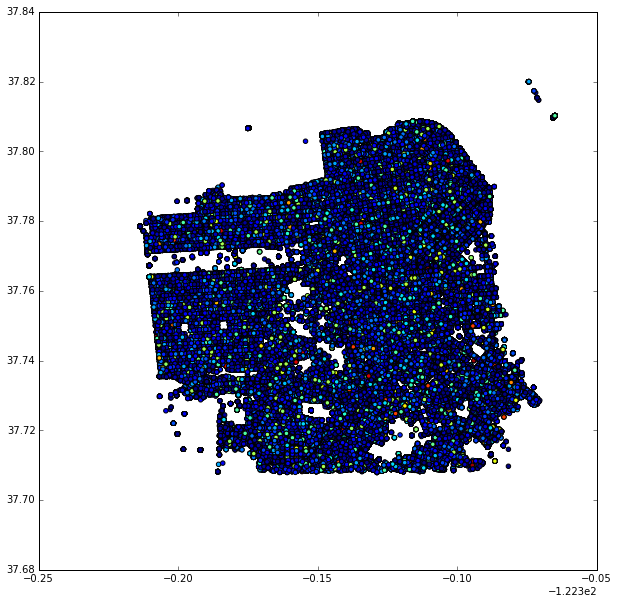

In [112]:
plt.figure(figsize=(10,10))
plt.scatter(df_train0[['X']],
            df_train0[['Y']],
            c=np.array(df_train0['Colors']),
            )

In [113]:
from IPython.core.display import HTML 

import folium  
import pandas as pd

SF_COORDINATES = (37.76, -122.45)  

#for speed purposes
MAX_RECORDS = 10000

#create empty map zoomed in on San Francisco
map = folium.Map(location=SF_COORDINATES, zoom_start=12)

for each in df_train0[:MAX_RECORDS].iterrows():  
    map.simple_marker(
        location = [each[1]['Y'],each[1]['X']], 
        clustered_marker = True)

map

In [115]:
crimedata = df_train0[df_train0['Category']=='ARSON']

#definition of the boundaries in the map
district_geo = r'sfpddistricts.geojson'

#calculating total number of incidents per district
crimedata2 = pd.DataFrame(crimedata['PdDistrict'].value_counts().astype(float))  
crimedata2.to_json('crimeagg.json')  
crimedata2 = crimedata2.reset_index()  
crimedata2.columns = ['District', 'Number']

#creation of the choropleth
map1 = folium.Map(location=SF_COORDINATES, zoom_start=12)  
map1.geo_json(geo_path = district_geo,  
              data_out = 'crimeagg.json', 
              data = crimedata2,
              columns = ['District', 'Number'],
              key_on = 'feature.properties.DISTRICT',
              fill_color = 'YlOrRd', 
              fill_opacity = 0.7, 
              line_opacity = 0.2,
              legend_name = 'Number of incidents per district')

map1  

In [131]:
from sklearn.neighbors import KNeighborsClassifier

In [151]:
df_X0 = df_train0[['X normal','Y normal','Ordinal normal','Saturday','Sunday','Friday','Thursday','Wednesday','PdDistrict codes']].as_matrix()
df_X1 = df_train1[['X normal','Y normal','Ordinal normal','Saturday','Sunday','Friday','Thursday','Wednesday','PdDistrict codes']].as_matrix()

df_Y0 = df_train0[['Category']].as_matrix().ravel()
df_Y1 = df_train1[['Category']].as_matrix().ravel()

neigh = KNeighborsClassifier(n_neighbors=5, 
                             weights='distance', 
                             algorithm='auto', 
                             leaf_size=100, 
                             p=2, 
                             metric='minkowski', 
                             metric_params=None, 
                             n_jobs=1)

In [152]:
neigh.fit(df_X0, df_Y0)

KNeighborsClassifier(algorithm='auto', leaf_size=100, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [153]:
neigh.score(df_X1, df_Y1)

0.22184931376829475

In [154]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, n_estimators=20)
rf.fit(df_X0, df_Y0)
rf.score(df_X1, df_Y1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

0.23741908540405096

# DDJ (Data Driven Journalism) To-Do

### SF Crime 
* What districts have the most crime? 
* Read about crime in SF
* Intersect ideas from the two articles
* Crime time trends over time

# Ideas

### Aritcle Ideas 
* Possible articles: "The affect of meta effective altruism"
* Poverty data in San Francisco
* Racial diversity in the Tech Industry
* Fair wages in San Francisco
* Labor unions in the tech industry
* Labor unions in the US
* Rent prices in SF

### Tasks
* Read the local news: Mercury

### The Process List
* Find an interesting source of political
* Integrate political arguments

### 1) What districts have the most crime?

In [381]:
# Load the original SF Crime data
sfcrime = pd.read_csv('data/Map__Crime_Incidents_-_from_1_Jan_2003.csv')

In [382]:
sfcrime.head()

IncidntNum                     Category  \
0    50436712                      ASSAULT   
1    80049078                LARCENY/THEFT   
2   130366639                      ASSAULT   
3    30810835  DRIVING UNDER THE INFLUENCE   
4   130839567               OTHER OFFENSES   

                                       Descript  DayOfWeek  \
0                                       BATTERY  Wednesday   
1                   GRAND THEFT FROM A BUILDING     Sunday   
2               AGGRAVATED ASSAULT WITH A KNIFE     Sunday   
3  DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL    Tuesday   
4                      TRAFFIC VIOLATION ARREST     Friday   

                     Date   Time  PdDistrict      Resolution  \
0  04/20/2005 12:00:00 AM  04:00     MISSION            NONE   
1  01/13/2008 12:00:00 AM  18:00        PARK            NONE   
2  05/05/2013 12:00:00 AM  04:10   INGLESIDE  ARREST, BOOKED   
3  07/08/2003 12:00:00 AM  01:00    SOUTHERN  ARREST, BOOKED   
4  10/04/2013 12:00:00 AM  20:53  TENDERLOIN  ARREST, BOOKED   

                       Address           X          Y  \
0          18TH ST / CASTRO ST -122.435003  37.760888   
1     1100 Block of CLAYTON ST -122.446838  37.762255   
2  0 Block of SGTJOHNVYOUNG LN -122.444707  37.724931   
3           MASON ST / TURK ST -122.408954  37.783288   
4     TURK ST / LEAVENWORTH ST -122.414056  37.782793   

                                Location  
0  (37.7608878061245, -122.435002864271)  
1  (37.7622550270122, -122.446837820235)  
2  (37.7249307267936, -122.444707063455)  
3  (37.7832878735491, -122.408953598286)  
4  (37.7827931071006, -122.414056291891)

In [383]:
df_district = sfcrime['PdDistrict'].value_counts()
district_sums = df_district.to_frame().reset_index()
district_sums.columns = ['District','Counts']
district_sums['Percent'] = district_sums['Counts']/district_sums['Counts'].sum()*100

In [384]:
sfcrime['Category'] = sfcrime.Category.fillna('None')
sfcrime['IncidntNum'] = sfcrime.IncidntNum .fillna(0)
sfcrime_by_district_category = sfcrime.groupby(['PdDistrict','Category']).IncidntNum.count().reset_index()
sfcrime_dist_cat_pivot = sfcrime_by_district_category.pivot_table(values='IncidntNum',index='PdDistrict',columns='Category').reset_index().fillna(0)

In [388]:
categories = list(sfcrime['Category'].unique())
category_ints = {i:x for x,i in enumerate(categories)}

In [390]:
for cat in categories:
    district_sums[cat] = sfcrime_dist_cat_pivot[cat]
    district_sums[cat+' % of total'] = 100*sfcrime_dist_cat_pivot[cat]/sfcrime.IncidntNum.sum()
    district_sums[cat+' % of category'] = 100*sfcrime_dist_cat_pivot[cat]/sfcrime_dist_cat_pivot[cat].sum()

In [393]:
perc_of_cat = district_sums[['District']+[cat+' % of category' for cat in categories]]
perc_of_cat

District  ASSAULT % of category  LARCENY/THEFT % of category  \
0    SOUTHERN              12.679606                     5.744713   
1     MISSION               9.116610                    14.430237   
2    NORTHERN              11.377671                     5.666365   
3     BAYVIEW              14.488701                    10.104226   
4     CENTRAL              10.817772                    16.498144   
5  TENDERLOIN               4.514764                     5.336355   
6   INGLESIDE               4.143746                     5.730204   
7     TARAVAL              15.772238                    24.150639   
8        PARK               7.072026                     6.798319   
9    RICHMOND              10.016864                     5.540798   

   DRIVING UNDER THE INFLUENCE % of category  OTHER OFFENSES % of category  \
0                                   8.057936                     13.414685   
1                                   7.160343                      7.206133   
2                                   9.200326                     10.623187   
3                                  15.442676                     15.216876   
4                                  10.913913                      9.809173   
5                                   7.384741                      5.100003   
6                                  14.279886                      4.449619   
7                                  13.259894                     16.704596   
8                                   9.751122                      6.934920   
9                                   4.549164                     10.540808   

   BURGLARY % of category  DRUG/NARCOTIC % of category  \
0               10.758128                     8.329946   
1               12.273358                     3.283383   
2                8.925728                     4.332078   
3               10.127639                    16.280519   
4               15.830294                     8.578345   
5                7.920284                     4.890298   
6                7.192203                     1.821893   
7               13.427757                    17.068170   
8                9.463763                     2.820909   
9                4.080846                    32.594459   

   NON-CRIMINAL % of category  SEX OFFENSES, FORCIBLE % of category  \
0                    6.685600                              9.382322   
1                   11.807689                              8.860490   
2                    7.464323                             11.778488   
3                   13.455591                             16.102236   
4                   11.067877                             10.436635   
5                    6.470832                              4.621938   
6                    6.218669                              4.728435   
7                   21.194817                             18.913738   
8                    7.644728                              8.253461   
9                    7.989873                              6.922258   

   SUSPICIOUS OCC % of category         ...          LOITERING % of category  \
0                     12.375238         ...                         4.058095   
1                      9.181917         ...                         6.108501   
2                      9.992967         ...                         2.007689   
3                     12.295928         ...                        16.061512   
4                     10.543643         ...                        16.873131   
5                      5.223936         ...                         1.623238   
6                      6.801143         ...                         1.025203   
7                     15.828931         ...                        34.216147   
8                      9.645802         ...                         2.947458   
9                      8.110494         ...                        15.079026   

   EMBEZZLEMENT % of category  KIDNAPPING % of category  \
0                    9.41

In [394]:
perc_of_cat.to_csv('perc_of_cat.csv',index=False)

In [395]:
!open perc_of_cat.csv

In [400]:
sfcrime['Datetime'] = sfcrime.Date.apply(lambda x: datetime.strptime(x,'%m/%d/%Y %H:%M:%S %p'))
sfcrime['Ordinal'] = sfcrime['Datetime'].apply(lambda x: x.toordinal())
sfcrime['Date_str'] = sfcrime['Datetime'].apply(lambda x: x.strftime('%Y-%m-%d'))
sfcrime['Month'] = sfcrime['Datetime'].apply(lambda x: x.strftime('%Y-%m'))
sfcrime['Year'] = sfcrime['Datetime'].apply(lambda x: x.strftime('%Y'))

In [404]:
min_date = min(sfcrime['Datetime'])
max_date = max(sfcrime['Datetime'])
periods = max_date - min_date

datelist = pd.date_range(max_datetime, periods=periods.days).tolist()

In [409]:
sfcrime_daily_ts = sfcrime.groupby('Date').IncidntNum.count()
sfcrime_monthly_ts = sfcrime.groupby('Month').IncidntNum.count()
sfcrime_yearly_ts = sfcrime.groupby('Year').IncidntNum.count()

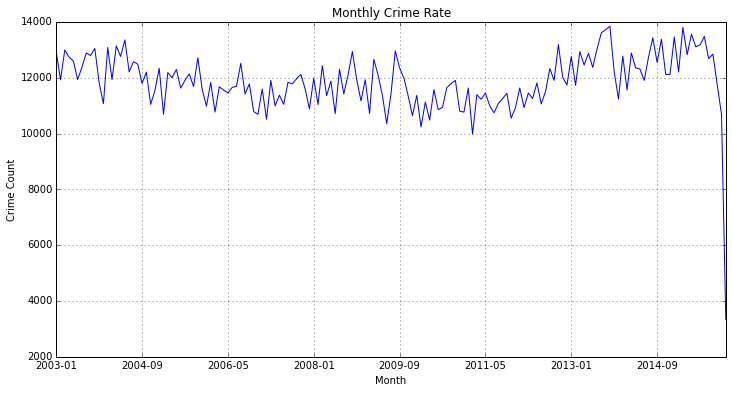

In [410]:
plt.figure(figsize=(12,6) )
sfcrime_monthly_ts.plot()
plt.title("Monthly Crime Rate")
plt.ylabel("Crime Count")
plt.show()

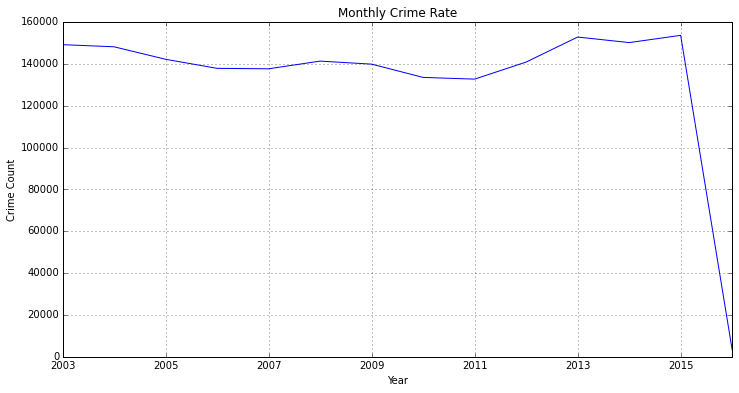

In [411]:
plt.figure(figsize=(12,6) )
sfcrime_yearly_ts.plot()
plt.title("Monthly Crime Rate")
plt.ylabel("Crime Count")
plt.show()

In [442]:
sfcrime_ts_category = sfcrime.groupby(['Month','Category']).IncidntNum.count().reset_index()
sfcrime_df = sfcrime_ts_category.pivot_table(index='Month',columns='Category',values='IncidntNum')

In [450]:
category_counts = sfcrime.groupby('Category').IncidntNum.count().reset_index().sort('IncidntNum',ascending=False)
top_categories = category_counts[category_counts.IncidntNum>10000].Category

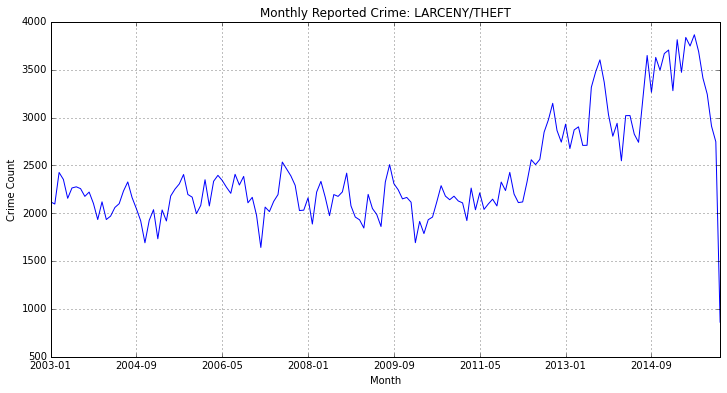

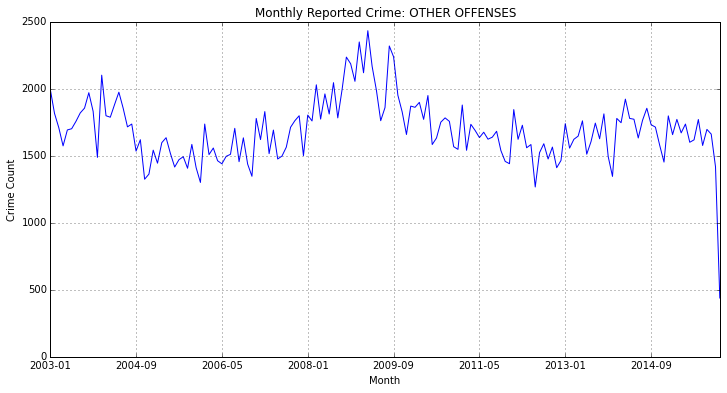

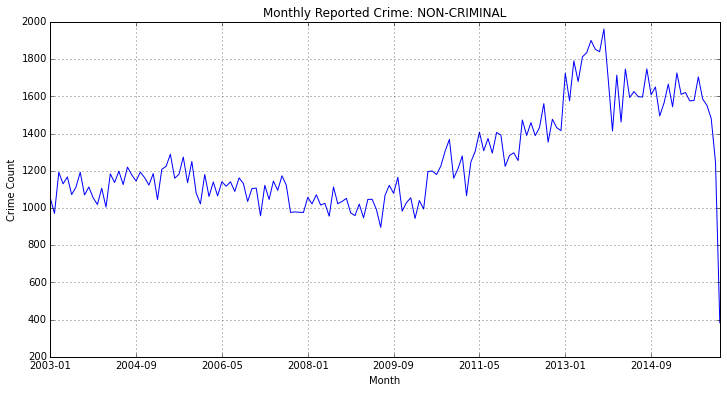

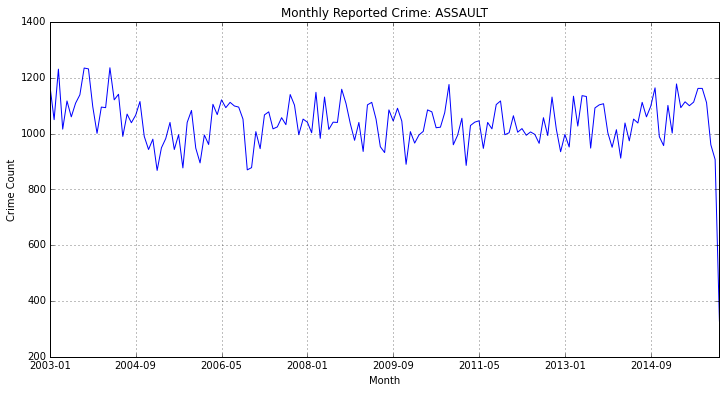

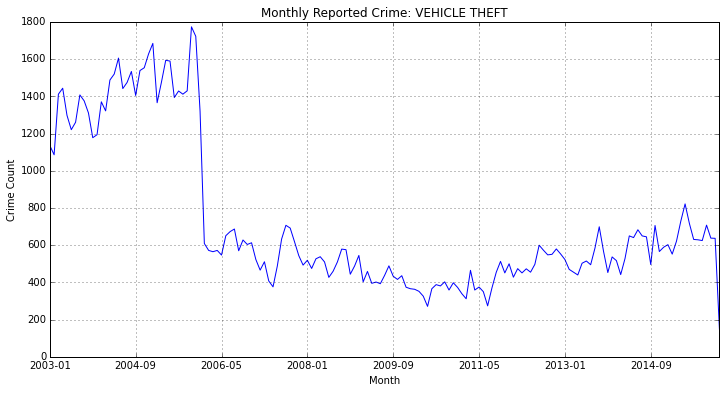

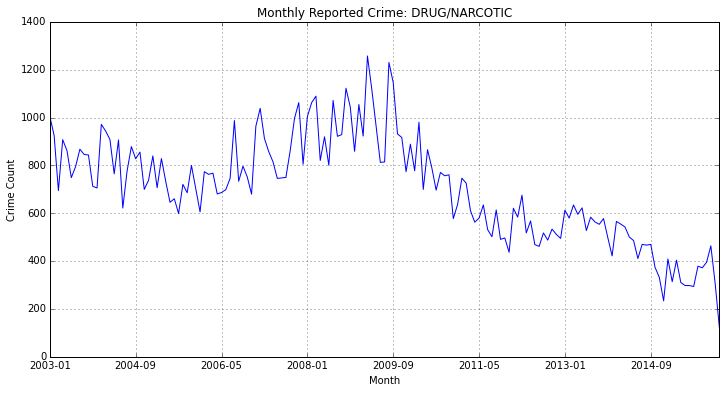

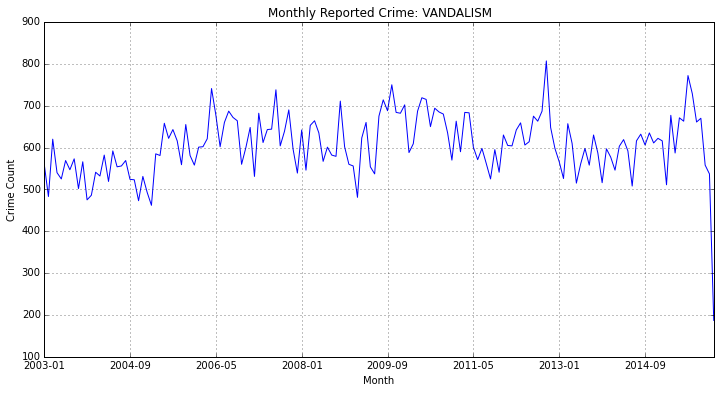

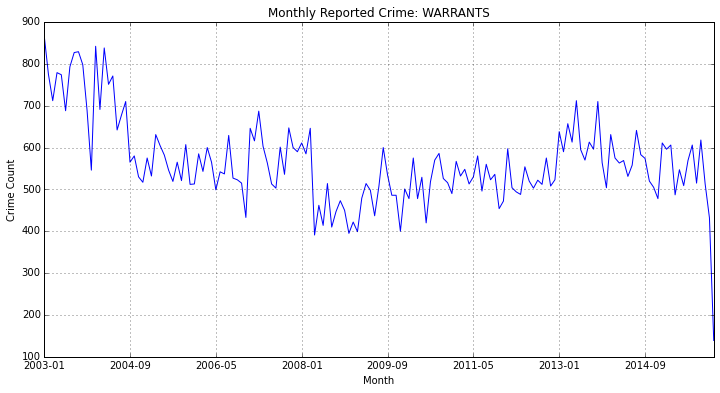

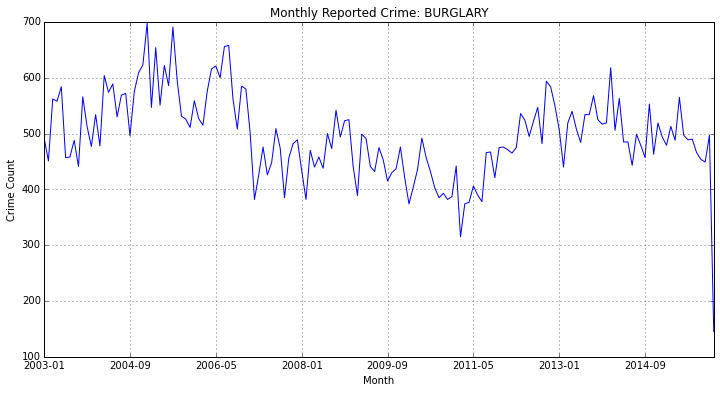

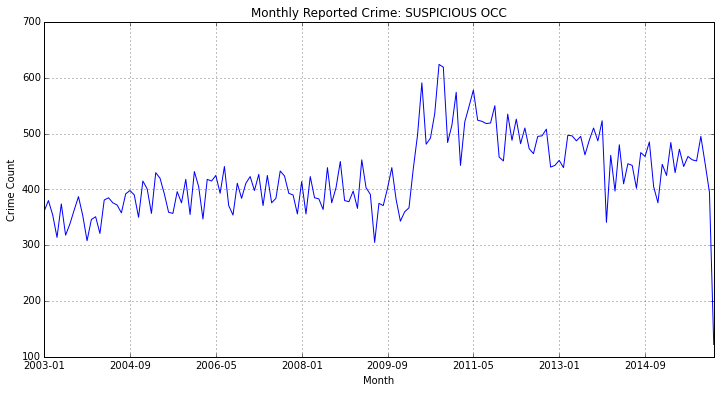

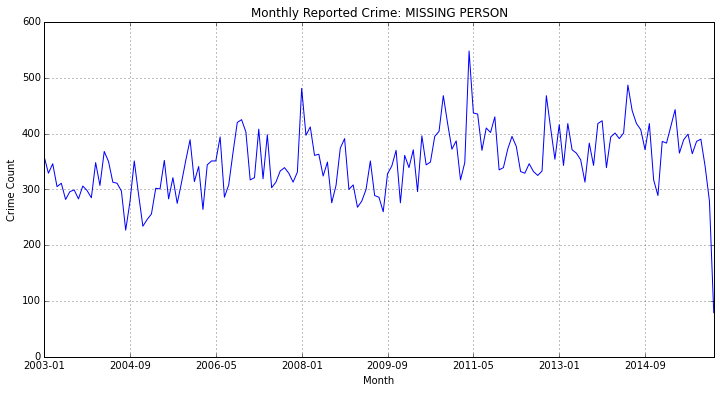

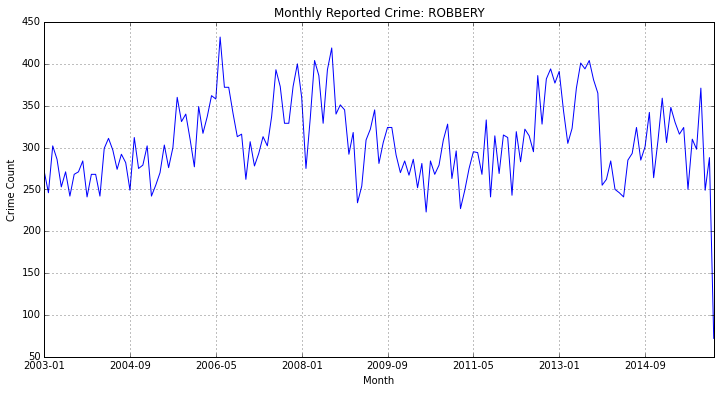

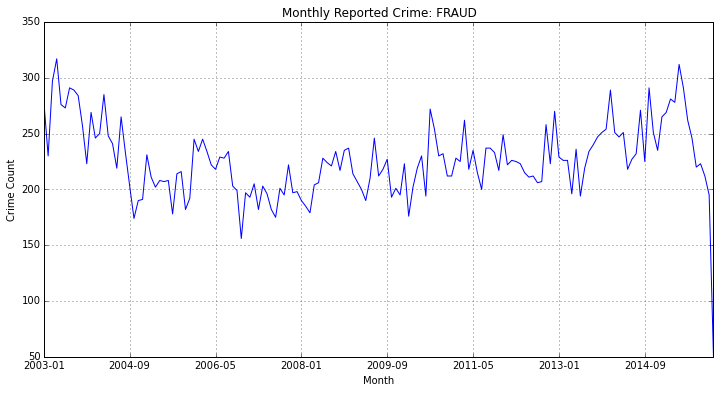

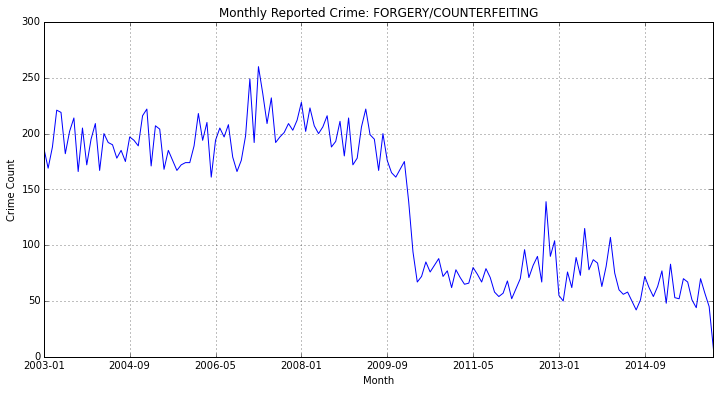

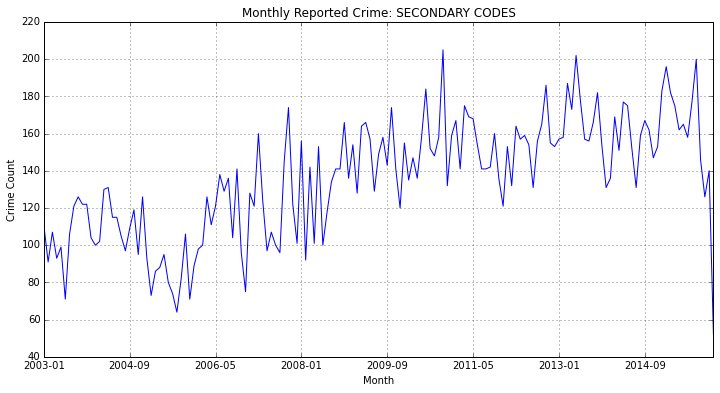

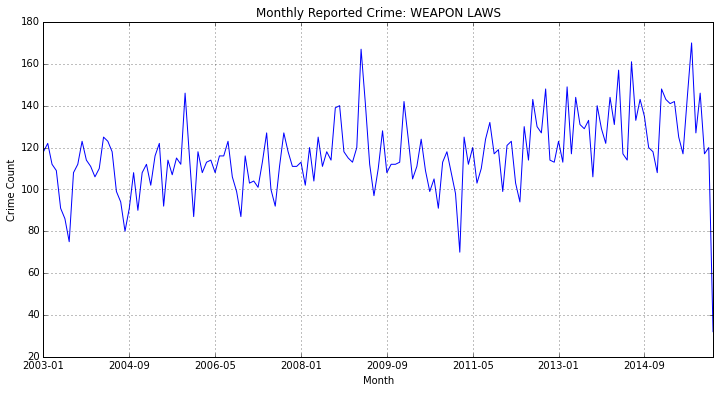

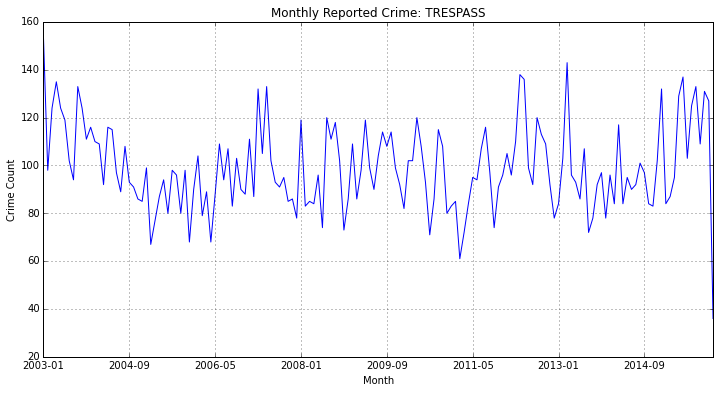

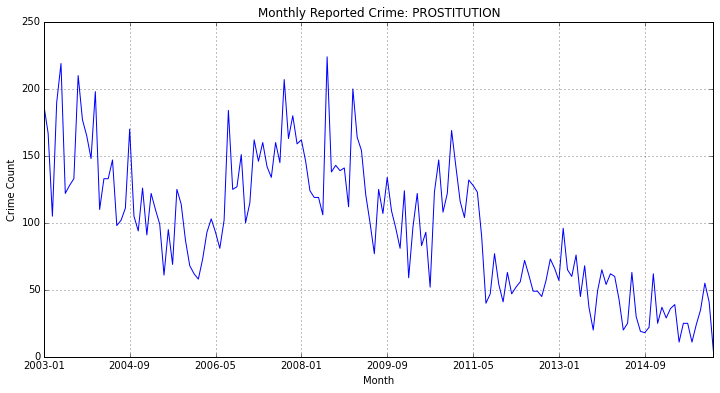

In [452]:
for col in list(top_categories):
    plt.figure(figsize=(12,6) )
    sfcrime_df[col].plot()
    plt.title("Monthly Reported Crime: {0}".format(col))
    plt.ylabel("Crime Count")
    plt.show()

In [458]:
x = sfcrime[sfcrime.Category=='VEHICLE THEFT'].groupby(['Month','Descript']).IncidntNum.count().reset_index()
y = x.pivot_table(index='Month',columns='Descript',values='IncidntNum')

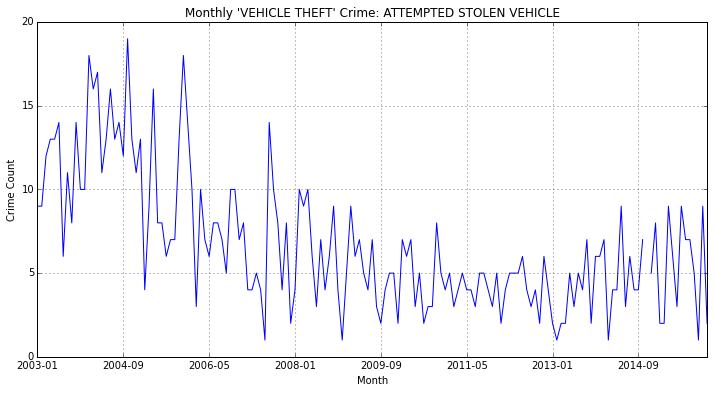

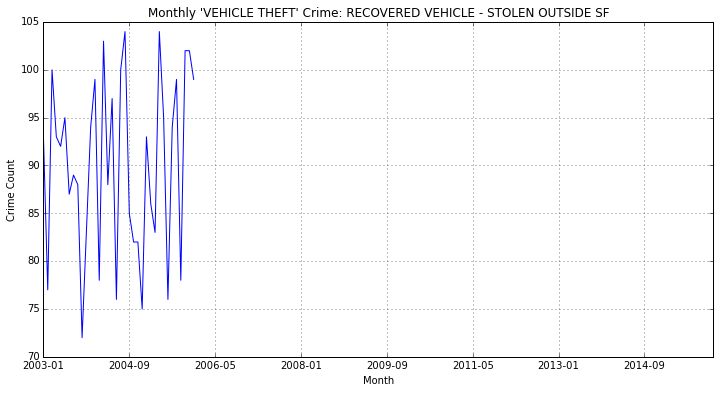

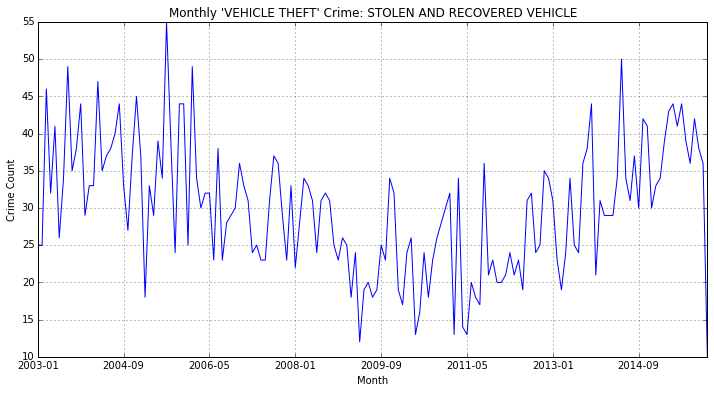

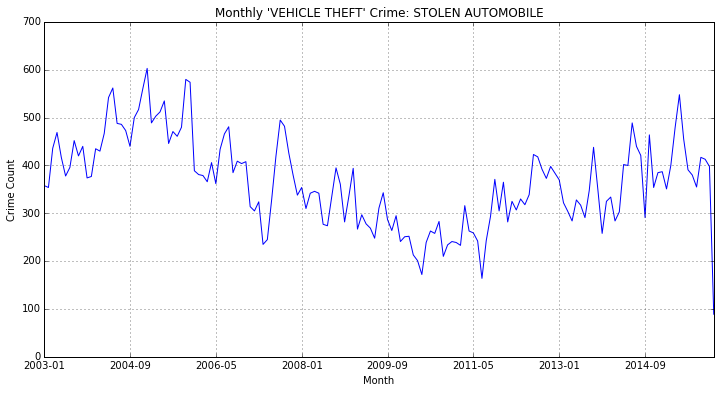

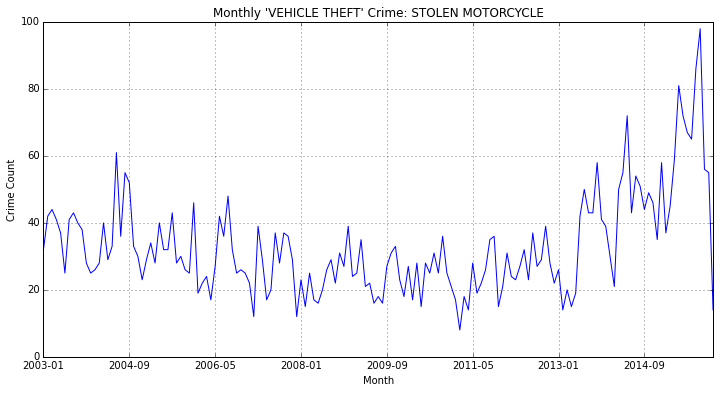

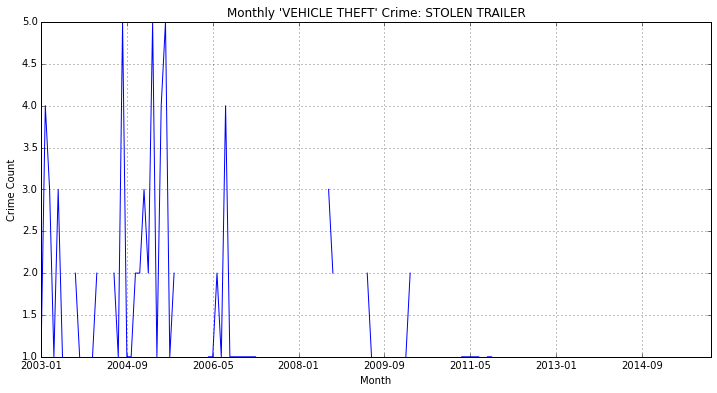

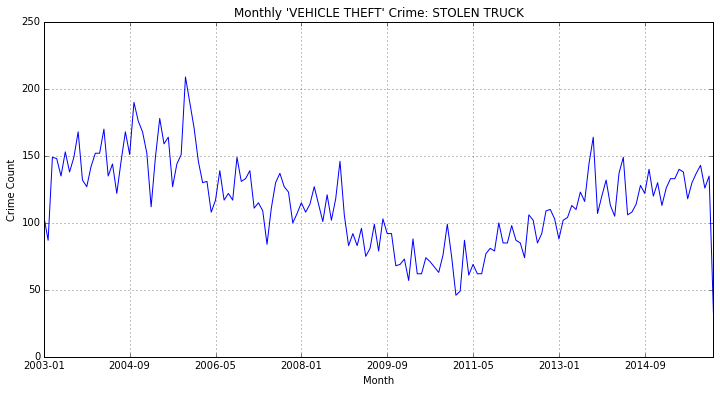

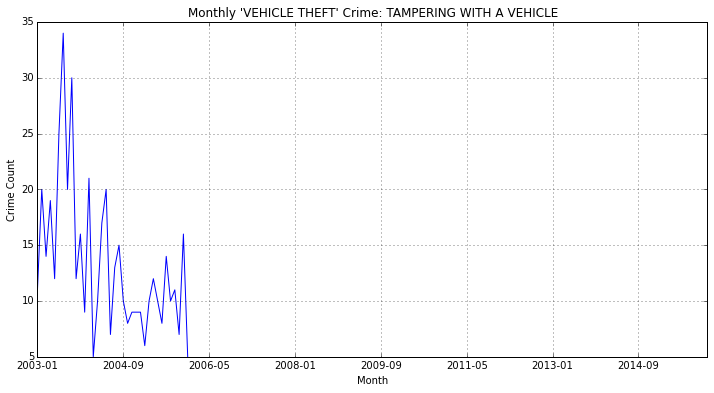

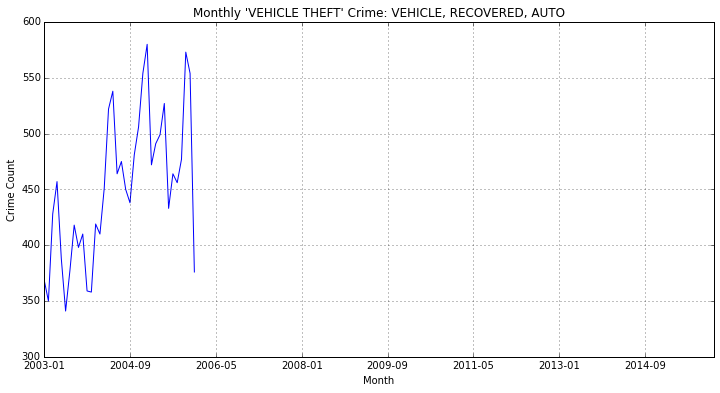

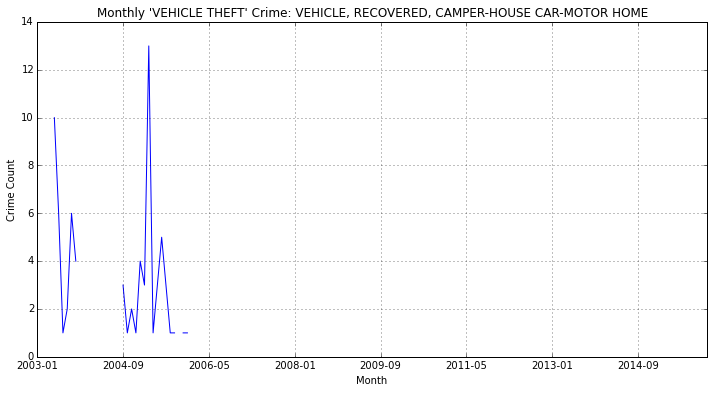

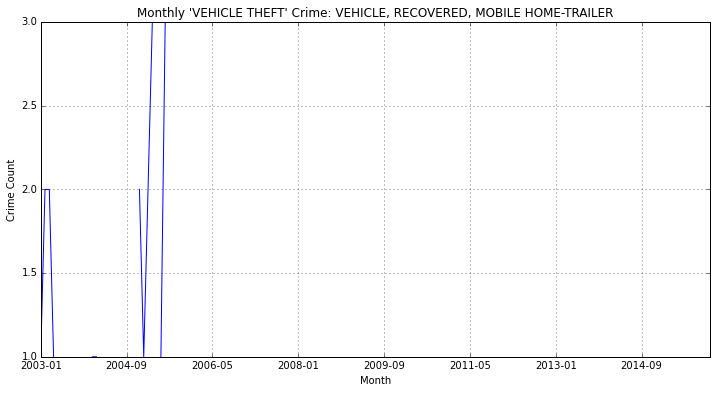

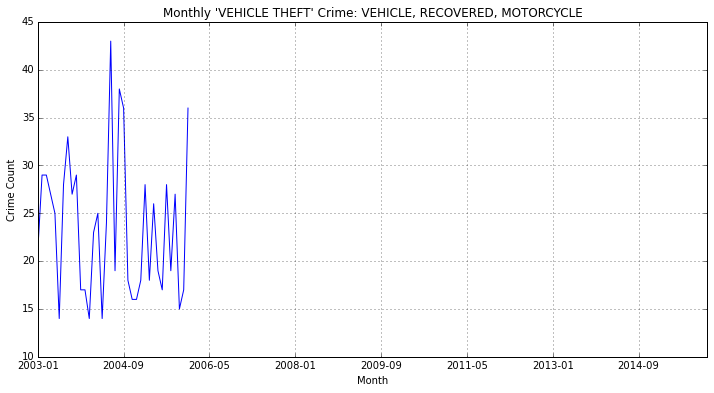

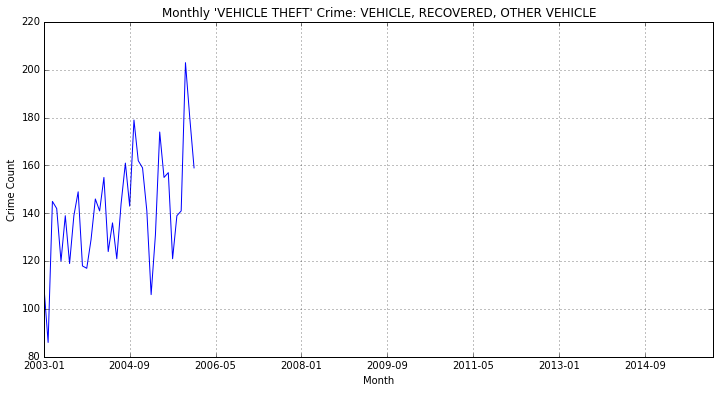

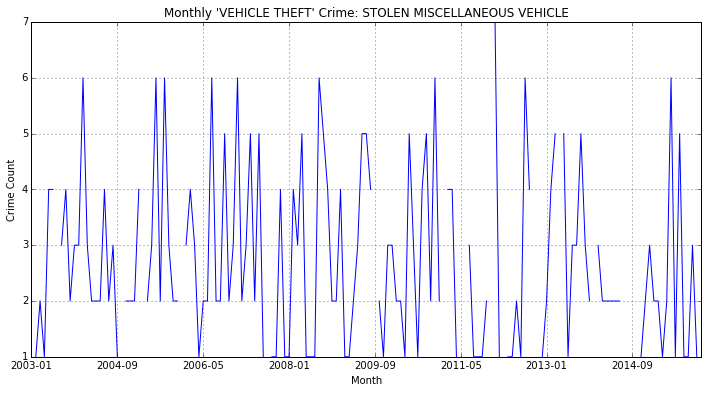

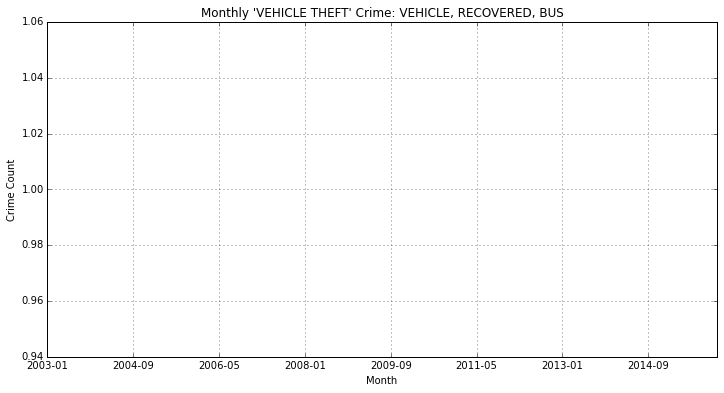

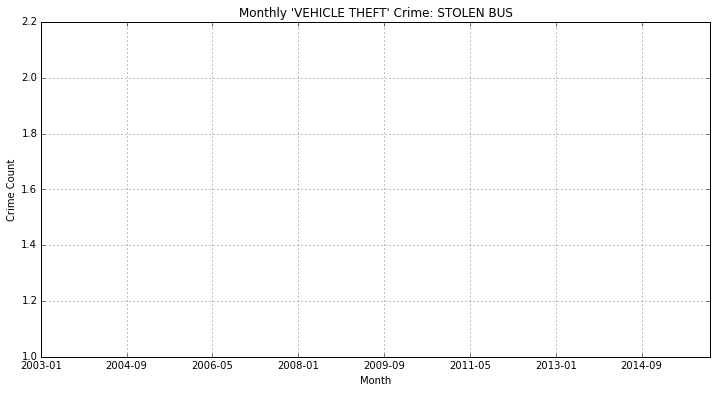

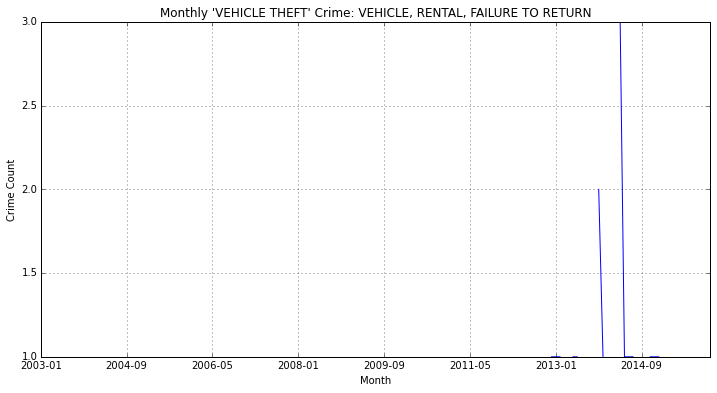

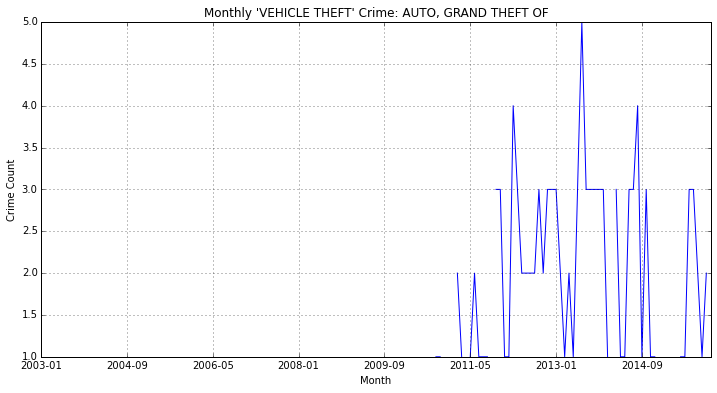

In [466]:
for col in list(x.Descript.unique()):
    plt.figure(figsize=(12,6) )
    y[col].plot()
    plt.title("Monthly 'VEHICLE THEFT' Crime: {0}".format(col))
    plt.ylabel("Crime Count")
    plt.show()

In [471]:
x = sfcrime[sfcrime['Category']=='LARCENY/THEFT'].groupby('Descript').IncidntNum.count().reset_index()
x.sort('IncidntNum',ascending=False).head(10)

Descript  IncidntNum
19                       GRAND THEFT FROM LOCKED AUTO      132172
36                       PETTY THEFT FROM LOCKED AUTO       42494
39                            PETTY THEFT OF PROPERTY       35160
23                            GRAND THEFT OF PROPERTY       23758
35                        PETTY THEFT FROM A BUILDING       21537
41                            PETTY THEFT SHOPLIFTING       20351
18                        GRAND THEFT FROM A BUILDING       19964
20                            GRAND THEFT FROM PERSON       14940
25                             GRAND THEFT PICKPOCKET       11826
21                     GRAND THEFT FROM UNLOCKED AUTO       10106
42                             PETTY THEFT WITH PRIOR        8195
37                     PETTY THEFT FROM UNLOCKED AUTO        5560
15                                GRAND THEFT BICYCLE        5341
9                 ATTEMPTED THEFT FROM LOCKED VEHICLE        4688
27                            GRAND THEFT SHOPLIFTING        4550
33                                PETTY THEFT BICYCLE        3374
31                         LOST PROPERTY, PETTY THEFT        2839
26                            GRAND THEFT PURSESNATCH        1492
46                  THEFT OF COMPUTERS OR CELL PHONES        1450
30                         LOST PROPERTY, GRAND THEFT        1376
14                             GRAND THEFT AUTO STRIP        1301
32                             PETTY THEFT AUTO STRIP        1157
43                     THEFT FROM MERCHANT OR LIBRARY         849
45                    THEFT OF CHECKS OR CREDIT CARDS         618
6                               ATTEMPTED SHOPLIFTING         468
8                     ATTEMPTED THEFT FROM A BUILDING         433
5                   ATTEMPTED PETTY THEFT OF PROPERTY         324
13  EMBEZZLEMENT FROM DEPENDENT OR ELDER ADULT BY ...         290
28                     LICENSE PLATE OR TAB, THEFT OF         279
10              ATTEMPTED THEFT FROM UNLOCKED VEHICLE         261
..                                                ...         ...
44                         THEFT OF ANIMALS (GENERAL)         145
0                                ATTEMPTED AUTO STRIP         127
61                           THEFT, GRAND, OF FIREARM         100
16                          GRAND THEFT BY PROSTITUTE          95
48                          THEFT OF UTILITY SERVICES          91
22                       GRAND THEFT MOTORCYCLE STRIP          85
17                  GRAND THEFT COIN OPERATED MACHINE          80
3                   ATTEMPTED GRAND THEFT PURSESNATCH          78
2                    ATTEMPTED GRAND THEFT PICKPOCKET          77
51             THEFT, BICYCLE, <$50, NO SERIAL NUMBER          76
38                       PETTY THEFT MOTORCYCLE STRIP          54
7               ATTEMPTED THEFT COIN OPERATED MACHINE          48
52          THEFT, BICYCLE, <$50, SERIAL NUMBER KNOWN          43
40                            PETTY THEFT PHONE BOOTH          41
54                       THEFT, DRUNK ROLL, $200-$400          34
60     THEFT, GRAND, BY FIDUCIARY, >$400 IN 12 MONTHS          31
47  THEFT OF TELECOMMUNICATION SERVICES, INCL. CLO...          29
55                        THEFT, DRUNK ROLL, $50-$200          23
57                           THEFT, DRUNK ROLL, >$400          22
56                            THEFT, DRUNK ROLL, <$50          19
53                                        THEFT, BOAT          18
24                            GRAND THEFT PHONE BOOTH          15
49                        THEFT OF WRITTEN INSTRUMENT          12
62       TRADE SECRETS, THEFT OR UNAUTHORIZED COPYING          12
4                          ATTEMPTED MOTORCYCLE STRIP           7
58                            THEFT, DRUNK ROLL, ATT.           3
59                         THEFT, GRAND, AGRICULTURAL           3
12                        ATTEMPTED THEFT PHONE BOOTH           3
50                                THEFT, ANIMAL, ATT.           2
29                 

In [ ]:
import folium
from folium import plugins
import numpy as np

data = (np.random.normal(size=(100, 3)) *
        np.array([[1, 1, 1]]) +
        np.array([[48, 5, 1]])).tolist()

mapa = folium.Map([48., 5.], tiles='stamentoner', zoom_start=6)
mapa.add_children(plugins.HeatMap(data))
mapa